In [1]:
#Import necessary packages for analysis and viz
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import requests
import io

# import folium
# from folium.plugins import HeatMap
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

import os


In [2]:
#read CSV file from GitHub url
url_vehicle_data = 'https://media.githubusercontent.com/media/kmantha95/Predicting-Used-Car-Prices-CapstoneProject/main/raw%20data/vehicles.csv'
vehicle_data = pd.read_csv(url_vehicle_data)

In [3]:
#info method on vehicle_data to see a summary of the data
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [4]:
#head method on ski_data to print the first several rows of the data
vehicle_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [5]:
#Count NaN's using .sum() and .isnull() in each column of vehicle_data.
#Count the percent of missing values in each column by using .mean() * 100
#Use pd.concat() to present sums and %s in single DataFrame
#Assign column names using .columns ('total_count' and '%')
#Order data using .sort_values()

missing_data = pd.concat([vehicle_data.isnull().sum(), 100 * vehicle_data.isnull().mean()], axis=1)
missing_data.columns=['total_count_missing', '%_missing']
missing_data.sort_values(by=['total_count_missing', '%_missing'])

,total_count_missing,%_missing
id,0,0.000000
url,0,0.000000
region,0,0.000000
region_url,0,0.000000
price,0,0.000000
state,0,0.000000
image_url,94196,22.223533
description,94203,22.225184
year,95114,22.440115
transmission,95792,22.600075


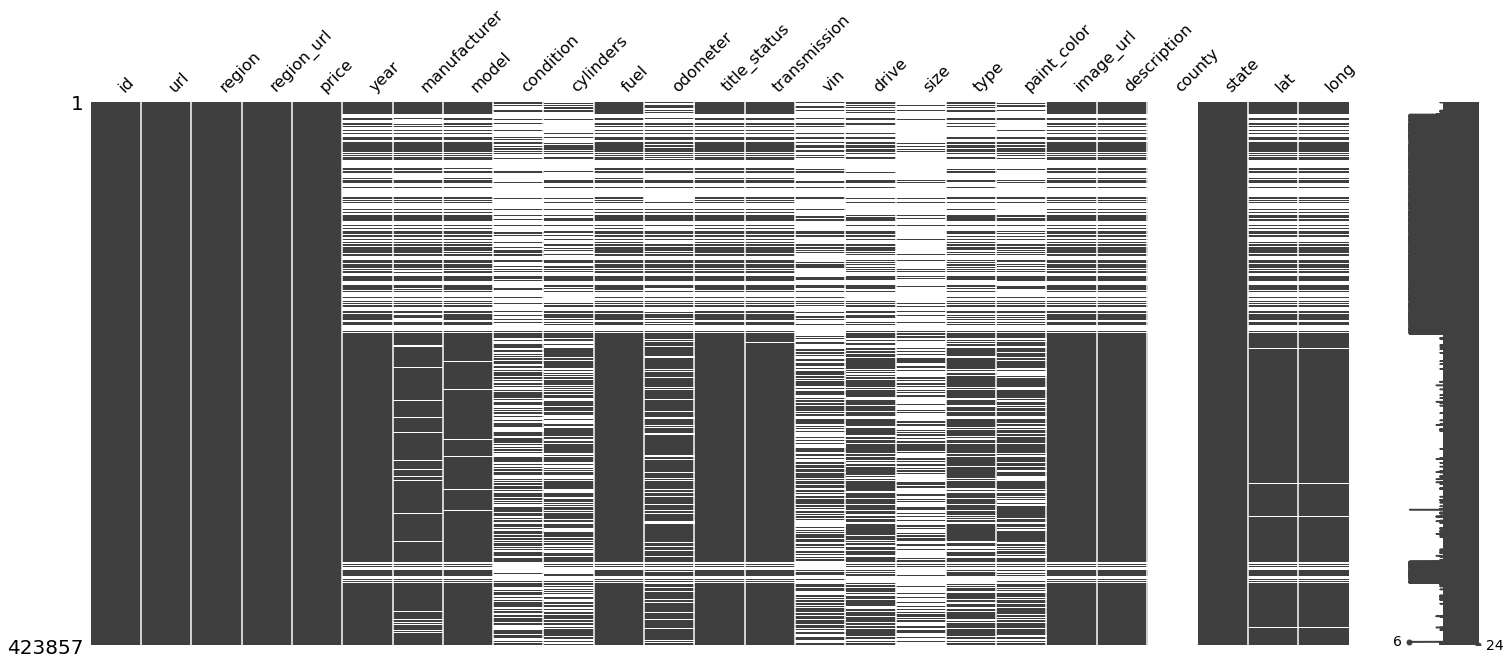

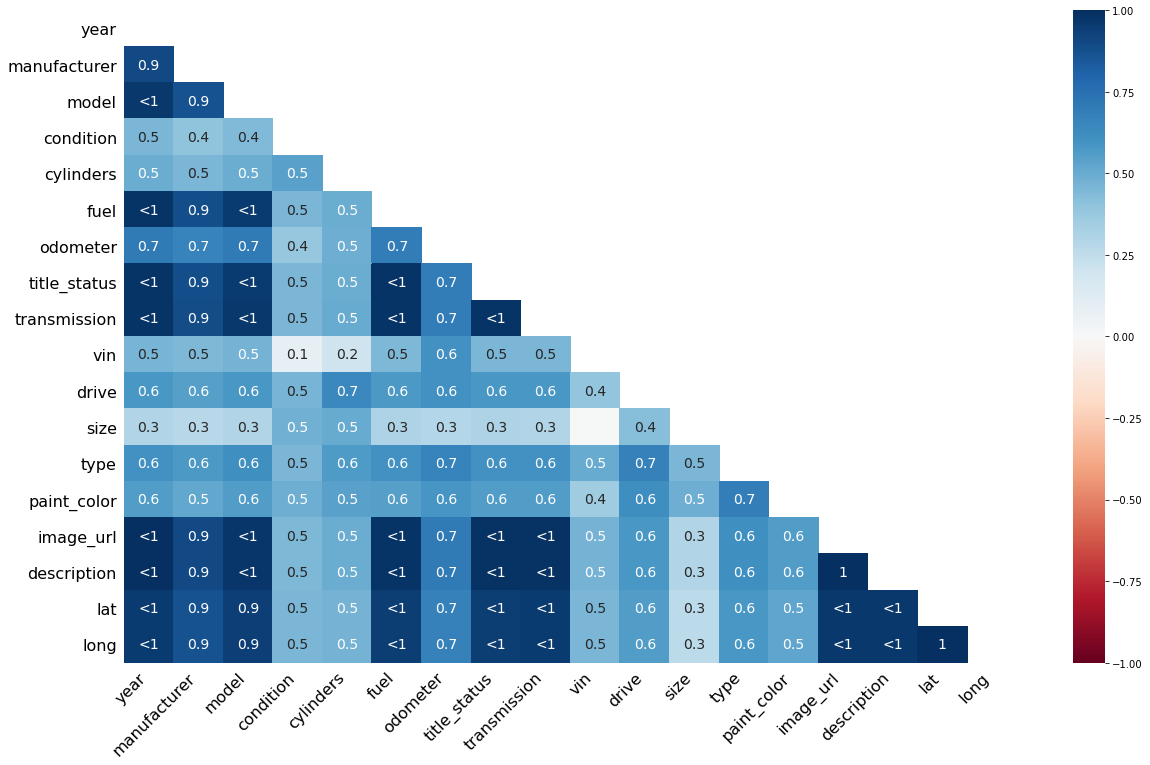

In [6]:
import missingno as msno

msno.matrix(vehicle_data)
msno.heatmap(vehicle_data)
plt.show()

It appears that `image_url`, `description`, `year`, `transmission`, `title_status`, `fuel`, `model`, `lat`, `long`, and `manufacturer` are all missing ~20-25% of their values. `county` is missing all values, and `size` is missing ~75%. It is notable that `condition` is missing ~60% of its values.

In order to predict used car values, there are certain features that do not have any bearing on the price. The `url` and `image_url` can be dropped as these features likely have no impact on the pricing of used cars, since there are numerous other identifying features. `county` can be dropped as well since it is missing all values, and we have other metrics for location already.

Although `vin` is missing over 50% of values, the vin number itself contains characters that can identify other features of the car such as year and model. Thus, since ~22% of models and years are missing, there may be values that the vin can help fill in.

Even though `size` is missing so much, it should still be included for now as it might be a notable feature.

In [12]:
vehicle_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [17]:
vehicle_data_drops = vehicle_data.drop(columns=['url','image_url', 'county'])

In [18]:
vehicle_data_drops.head()

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,vin,drive,size,type,paint_color,description,state,lat,long
0,7184791621,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,...,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn,46.8433,-92.2550
1,7184773187,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,...,automatic,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn,46.9074,-92.4638
2,7193375964,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,...,automatic,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,ct,41.1770,-73.1336
3,7195108810,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,...,manual,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",nm,35.1868,-106.6650
4,7184712241,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,...,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648


In [23]:
vehicle_data_drops['vin'].describe()

count                184420
unique               103588
top       1HTMRAAM19J040080
freq                    133
Name: vin, dtype: object

In [22]:
vehicle_data_drops['year'].describe()

count    328743.000000
mean       2009.827358
std          10.135809
min        1900.000000
25%        2007.000000
50%        2012.000000
75%        2016.000000
max        2021.000000
Name: year, dtype: float64

In [26]:
vin_kv_dict = {'L':1990, 'M':1991, 'N':1992, 'P':1993, 'R':1994, 'S':1995, 'T':1996, 'V':1997, 'W':1998, 'X':1999, 'Y':2000,
               '1':2001, '2':2002, '3':2003, '4':2004, '5':2005, '6':2006, '7':2007, '8':2008, '9':2009, 'A':2010, 'B':2011,
               'C':2012, 'D':2013, 'E':2014, 'F':2015, 'G':2016, 'H':2017, 'I':2018, 'J':2019, 'K':2020}

In [30]:
vinlist = vehicle_data_drops['vin'].to_list()

In [39]:
vin_digit10 = [i[9] for i in vinlist]

vin_digit10[7]

TypeError: 'float' object is not subscriptable

In [ ]:
vehicle_data_drops['vin_year'] = vehicle_data_drops['vin'].

In [31]:
vehicle_data_drops['manufacturer'].unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [36]:
vehicle_data_drops['manufacturer'].value_counts()

ford               59786
chevrolet          46603
toyota             26001
honda              18898
nissan             17536
jeep               14224
gmc                12782
dodge              12547
ram                11917
hyundai             8765
subaru              7971
bmw                 7717
volkswagen          7121
kia                 7069
mercedes-benz       6859
chrysler            5903
buick               4668
cadillac            4615
mazda               3964
lexus               3916
audi                3334
acura               2784
lincoln             2593
pontiac             2323
infiniti            2318
volvo               2097
mitsubishi          1945
mercury             1330
mini                1320
rover               1151
saturn              1083
jaguar               787
fiat                 567
tesla                299
alfa-romeo           138
harley-davidson      125
datsun                69
ferrari               64
aston-martin          28
land rover            15


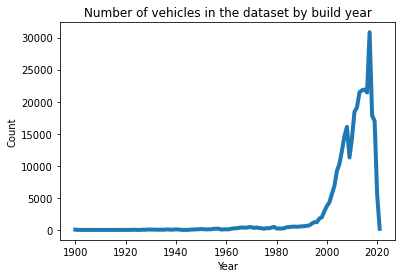

In [37]:
#are there any inaccuracies in the year of the car's build? there shouldn't be any cars from before 1900
vehicle_data[vehicle_data.year >= 1900].year.value_counts().sort_index().plot(lw = 4)
plt.title("Number of vehicles in the dataset by build year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [38]:
#what type of condition are we seeing on most listed vehicles?
vehicle_data['condition'].value_counts()

excellent    85254
good         65262
like new     17880
fair          6724
new           1069
salvage        530
Name: condition, dtype: int64

In [39]:
#what is the status of the vehicles we're seeing?
vehicle_data['title_status'].value_counts()

clean         315607
rebuilt         6017
salvage         3248
lien            1963
missing          711
parts only       213
Name: title_status, dtype: int64